**Objective and Data Description**
1. I sourced this dataset from the United Nations Department of Economic and Social Affairs Population Division. It is a large dataset of demegraphic indicators from 1950 to 2100. While the dataset contains data from all countries, I only pulled data from African countries to make it a more managable size.
2. My research object is to learn to utilize the k Nearest Neighbor discriminative algorithm on my United Nations dataset and see if it performs well. Since k-nn does well when the inter relationships between features are complex, I am optimistic that it will work on this dataset, since many of the demegraphic indicators have complex relationsips to one another.
3. My research question is to predict life expectancy at birth using the total fertility rate, the rate of natural change per 1,000 population, and the crude death rate.

**Statistical Numerical and Graphical Summaries**

In [ ]:
# Import required packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Step 1: Read the data
# Read the data, print the shape and first 5 rows.
import pandas as pd
import io
from google.colab import files
print(uploaded.keys())
UNdata = pd.read_csv(io.BytesIO(uploaded['UNworldpopdatanew (7).csv']))

dict_keys(['UNworldpopdatanew (7).csv'])


In [ ]:
#Taking a look at the dataset
print(UNdata.shape)
print(UNdata.head())

(4177, 65)
   Index    Variant  Country  Notes  Location_code ISO3 Alpha-code  \
0   1733  Estimates  Burundi    NaN            108             BDI   
1   1734  Estimates  Burundi    NaN            108             BDI   
2   1735  Estimates  Burundi    NaN            108             BDI   
3   1736  Estimates  Burundi    NaN            108             BDI   
4   1737  Estimates  Burundi    NaN            108             BDI   

  ISO2 Alpha-code  SDMX code**          Type  Parent code  ...  \
0              BI          108  Country/Area          910  ...   
1              BI          108  Country/Area          910  ...   
2              BI          108  Country/Area          910  ...   
3              BI          108  Country/Area          910  ...   
4              BI          108  Country/Area          910  ...   

   Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)  \
0                                                642                               
1  

In [ ]:
#Printing a description of the dataset
print(UNdata.describe())
print(UNdata.describe().T)

             Index       Notes  Location_code  SDMX code**  Parent code  \
count  4177.000000  360.000000    4177.000000  4177.000000  4177.000000   
mean   3952.089059    2.400000     464.986354   464.771606   911.825473   
std    1320.513296    1.021223     248.936431   248.937621     1.667943   
min    1733.000000    1.000000      12.000000    12.000000   903.000000   
25%    2777.000000    2.000000     231.000000   231.000000   910.000000   
50%    3964.000000    2.000000     478.000000   466.000000   911.000000   
75%    5152.000000    3.000000     694.000000   694.000000   914.000000   
max    6196.000000    4.000000     912.000000   894.000000   914.000000   

              Year  TotalPopulation,asof1January(thousands)  Total_Population  \
count  4177.000000                              4177.000000       4177.000000   
mean   1985.508499                             11010.086186      11152.445535   
std      20.789862                             19853.462770      20105.638712   


In [ ]:
#Looking at the available keys in the dataset
types = UNdata.dtypes
print(types)
print("Keys of UNdata dataset:\n", UNdata.keys())

Index                                                                                               int64
Variant                                                                                            object
Country                                                                                            object
Notes                                                                                             float64
Location_code                                                                                       int64
                                                                                                   ...   
Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)        object
Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)         object
Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)      int64
Net Number of Migrants (thousands)            

In [ ]:
# print the target variable, life expectancy at birth
print("Life_Expectancy_at_Birth", UNdata['Life_Expectancy_at_Birth'])

Life_Expectancy_at_Birth 0       40.6
1       40.8
2       41.0
3       41.3
4       41.6
        ... 
4172    60.2
4173    60.2
4174    60.9
4175    61.0
4176    61.6
Name: Life_Expectancy_at_Birth, Length: 4177, dtype: float64


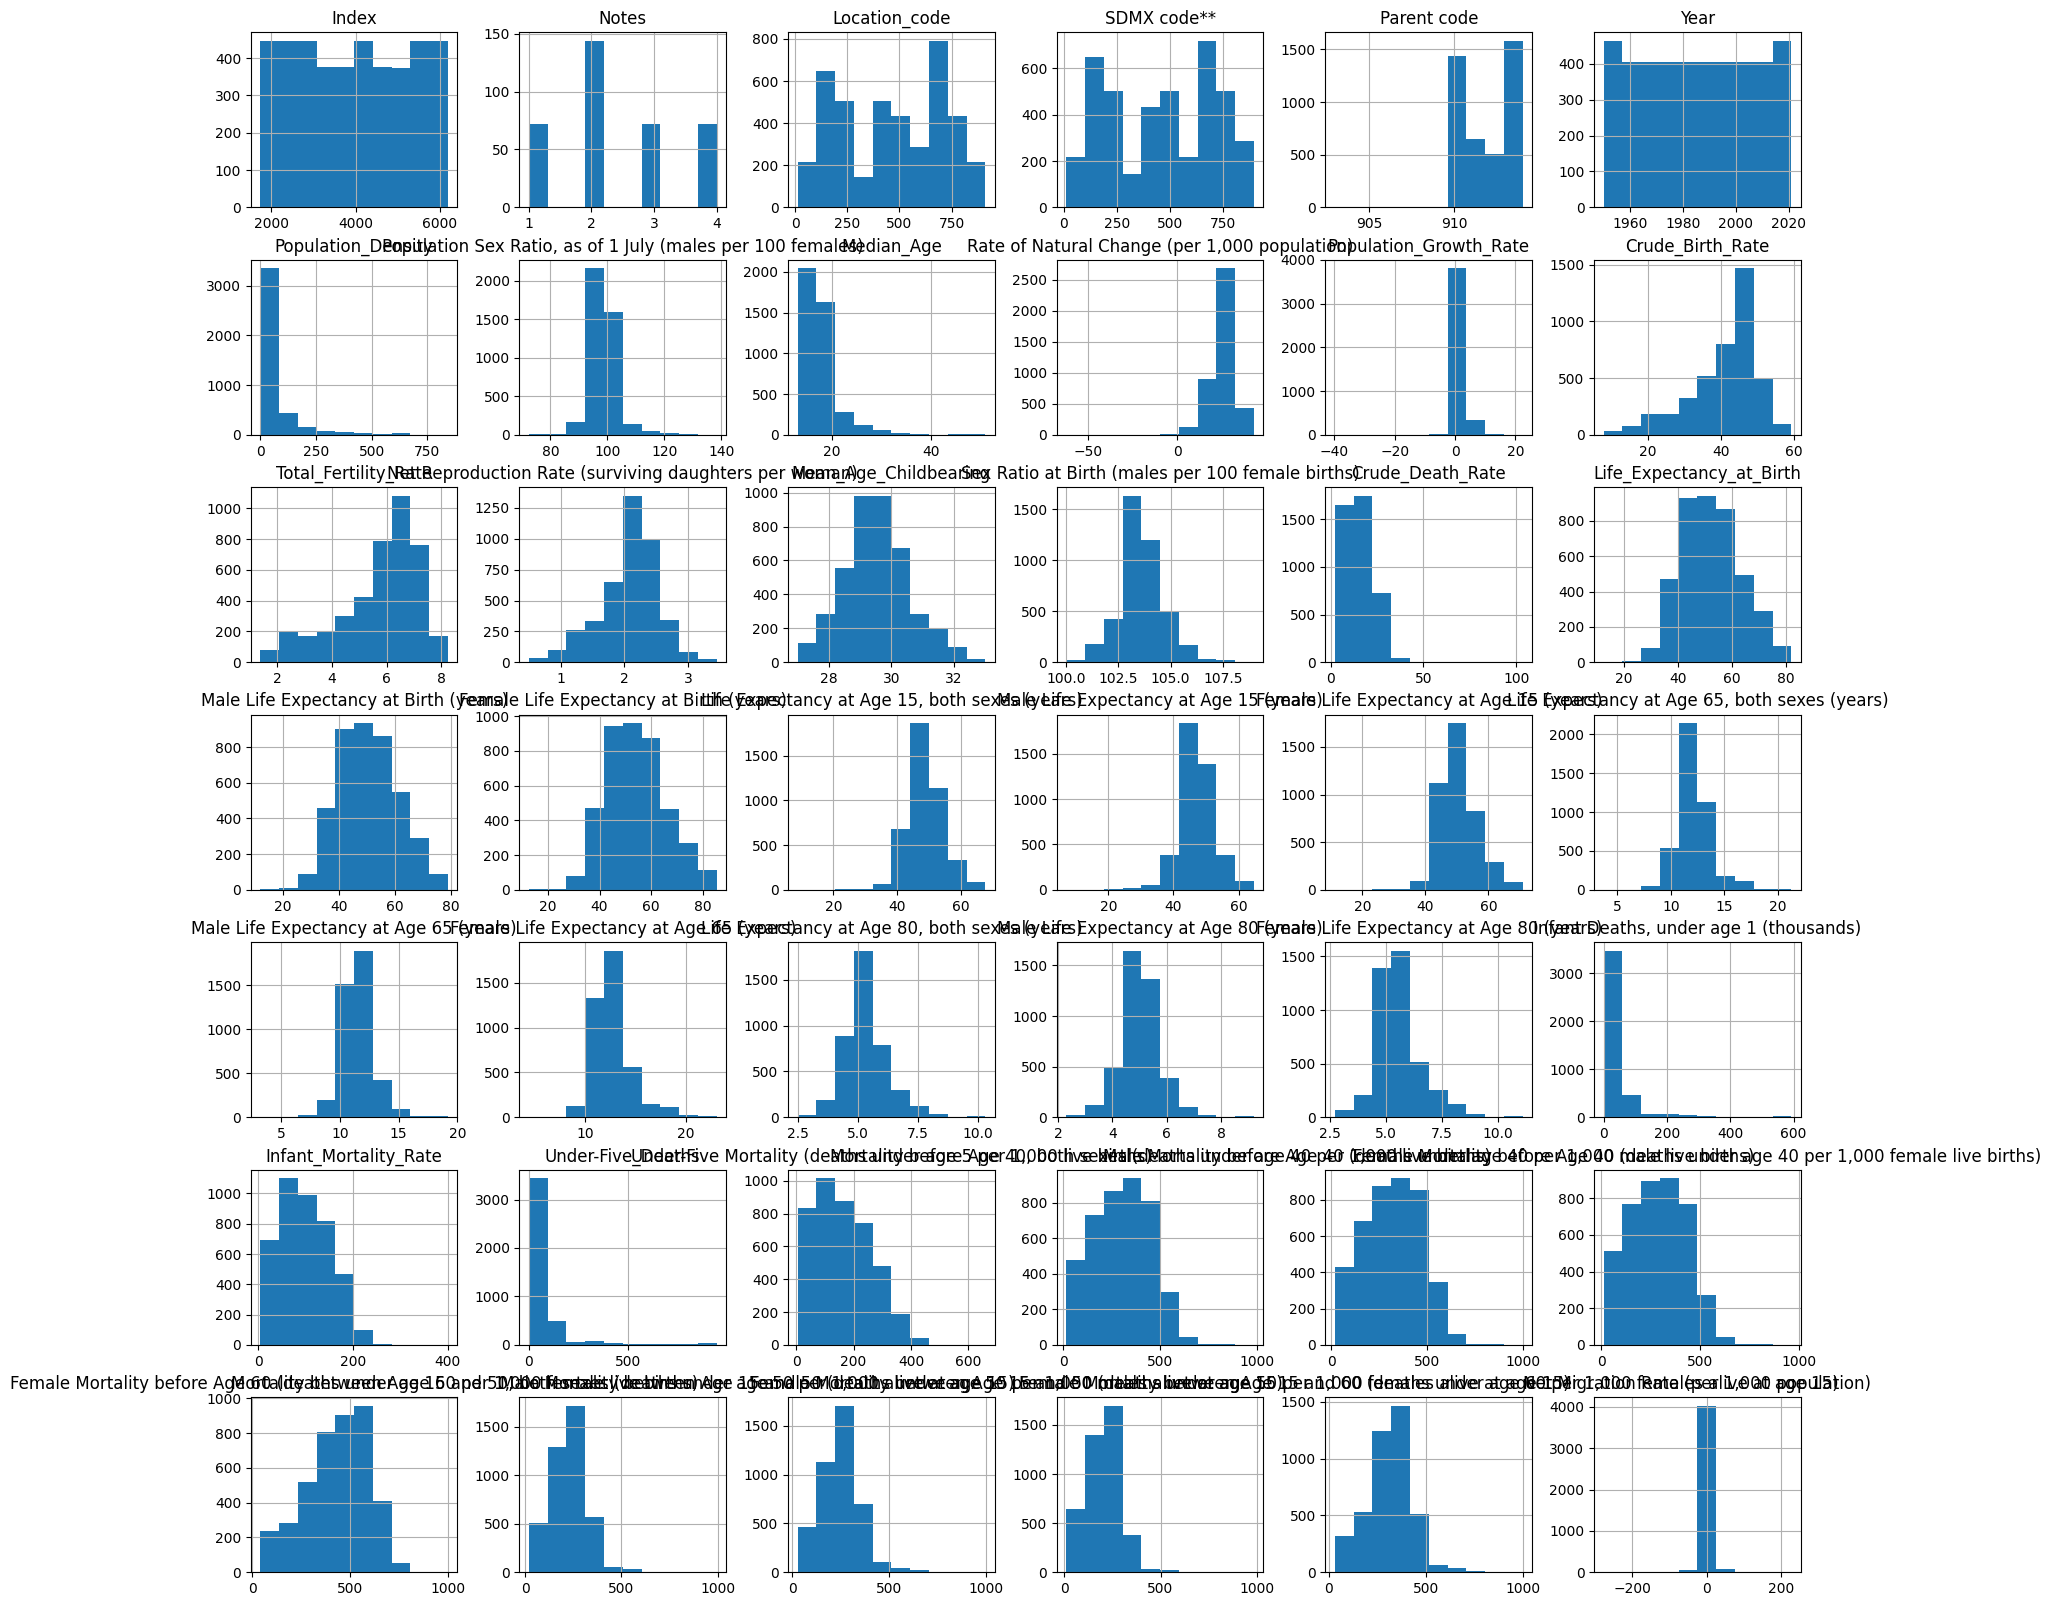

In [ ]:
#Showing histograms for each variable, which shows the distribution, spread, and skew of each variable
%matplotlib inline
UNdata.hist(figsize = (20,20))
plt.show()

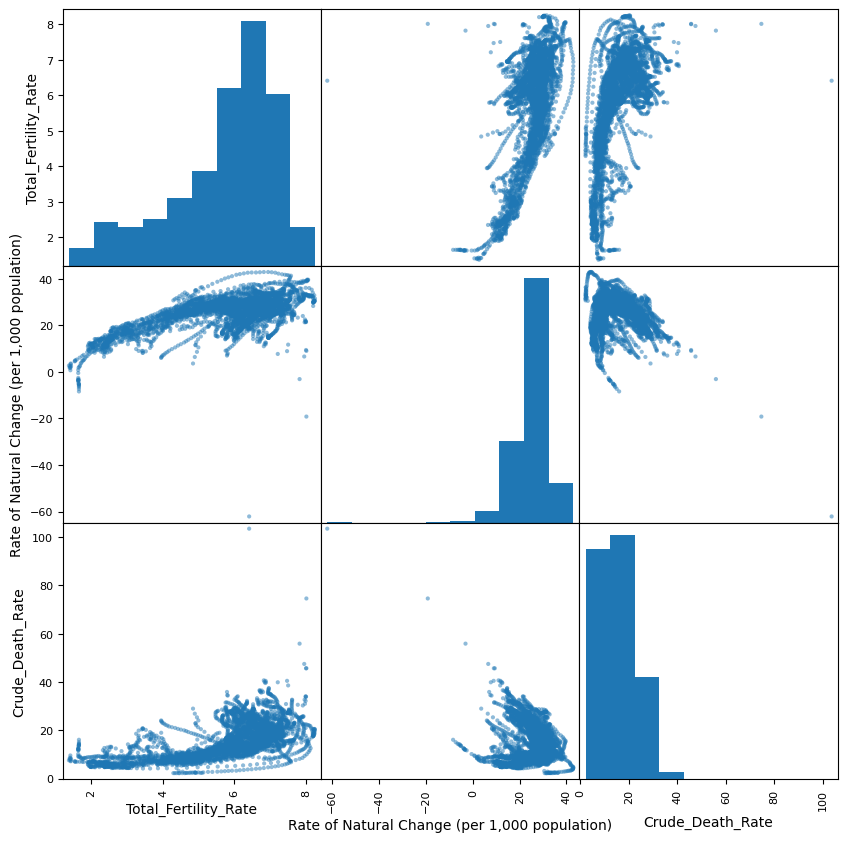

In [ ]:
#This figure shows the histograms for each variable as well as a graph that shows how they interact with one another.
%matplotlib inline
X = UNdata[['Total_Fertility_Rate','Rate of Natural Change (per 1,000 population)', 'Crude_Death_Rate']]
from pandas.plotting import scatter_matrix
scatter_matrix(X,figsize=(10, 10))
plt.show()

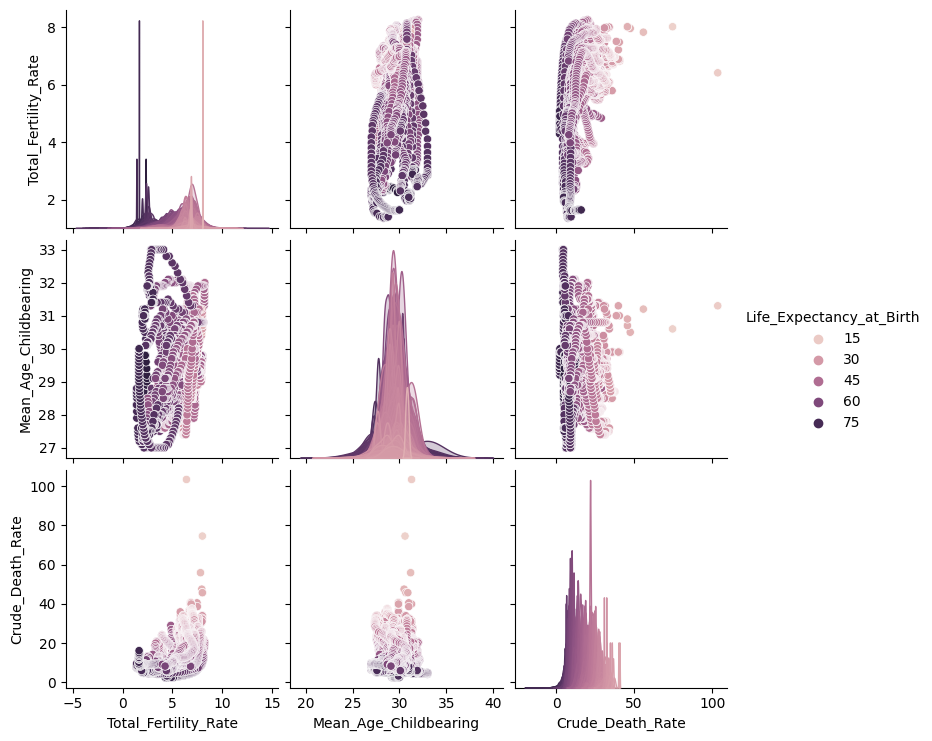

In [ ]:
#Another visual of the variables and their relationships
%matplotlib inline
X = UNdata[['Total_Fertility_Rate','Rate of Natural Change (per 1,000 population)', 'Crude_Death_Rate', 'Life_Expectancy_at_Birth']]
from pandas.plotting import scatter_matrix
sns.pairplot(X, hue = 'Life_Expectancy_at_Birth')
plt.show()

**Algorithm Implementation and Statistical Tests**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Divide data into predictor features vector and the label of the target variable 'Risk'

X = UNdata[['Total_Fertility_Rate','Rate of Natural Change (per 1,000 population)', 'Crude_Death_Rate', 'Life_Expectancy_at_Birth']]
y = UNdata[['Infant Deaths, under age 1 (thousands)']]

# Check if null values in the columns
X.isna().sum()


Total_Fertility_Rate                             0
Rate of Natural Change (per 1,000 population)    0
Crude_Death_Rate                                 0
Life_Expectancy_at_Birth                         0
dtype: int64

In [ ]:
#Print the shape of the x and y data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3341, 4)
y_train shape: (3341, 1)
X_test shape: (836, 4)
y_test shape: (836, 1)


In [ ]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
# Setting the number of neighbors
classifier = KNeighborsClassifier(n_neighbors=10)
# Loading the training set. np ravel is used to align the train data and its class label in the same orientation
classifier.fit(X_train, np.ravel(y_train,order='C'))

# Predicting the test labels
y_pred = classifier.predict(X_test)
y_pred

array([ 50,   1,  13,   2,   5,  29,   5,   3,  12,  57,   0,   3,   5,
         4,   1,   6,  16,  24,   2,   0,   8,   3,  52,   0,  46,   5,
        20,   3,  78,   3,   3,  60,   4,  13,  52,   9,   3,   0,   1,
         1,   2,  45,   5,   1,   2,   0,   1,   2,   5,  14,   5,  50,
        19,   5,  31,  24,  49,  27,   2,   0,   2,  23,   0,   3,  56,
         6,   1,  46,   2, 174,   0,  23,  15,  16,   1,  37,   1,  33,
        40,   5,   3, 105,  14,  78,   0,   2,  47,   0,   1,  11,   3,
         3,  32,  53,   4,  45,   6,   1,   1,   7,  34,  14,   0,   2,
         0,  41,   0,   0,  14,  15,  13,  56,   5,  18,   0,   3,   8,
        13,   7,   2,   0,  26,   2,  20,   0,  57,  34,   2,  12,   3,
        67,   0,  40,   5,  13,  15,  21,  52, 212,   1,   9,  45,  19,
         3,  13,  25,  21,  12,   3,  17,  12,   2,   5,   1,   5,   2,
         0,  45,  31,  13,   1,  23,  22,   2,  22,   5,   0,  20,  62,
         7,   2,   5,   1,   5,   5,  11,   0,   5,  30,  18,  1

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# creating confusion matrix and printing the classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy =  accuracy_score(y_test,y_pred)*100
print(accuracy)

[[10  8 10 ...  0  0  0]
 [ 1  4  4 ...  0  0  0]
 [11  7  3 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.10      0.11      0.10        95
           1       0.06      0.10      0.08        41
           2       0.03      0.04      0.04        68
           3       0.07      0.14      0.09        36
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00        16
           7       0.10      0.10      0.10        10
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         4
          12       0.06      0.11      0.08         9
          13       0.00      0.00      0.00         7
          14       0.00      0.00

Interpretation: This output indicates that this algorithm has 33% accuracy. This means that after learning the training data, it has a 33% chance of predicting life expectancy based on the total fertility rate, the rate of natural change per 1,000 population, and the crude death rate.

**Performance Improvement**

[0.458133971291866, 0.4366028708133971, 0.4342105263157895, 0.4138755980861244, 0.4090909090909091, 0.3923444976076555, 0.3827751196172249, 0.3660287081339713, 0.37200956937799046, 0.35526315789473684, 0.3492822966507177, 0.3397129186602871, 0.33133971291866027, 0.326555023923445, 0.3277511961722488, 0.3229665071770335, 0.3181818181818182, 0.30861244019138756, 0.3062200956937799, 0.3026315789473684, 0.3014354066985646, 0.29904306220095694, 0.29545454545454547, 0.28588516746411485, 0.28588516746411485, 0.2799043062200957, 0.2834928229665072, 0.2822966507177033, 0.2799043062200957, 0.2751196172248804, 0.27392344497607657, 0.2703349282296651, 0.26555023923444976, 0.26674641148325356, 0.2631578947368421, 0.2619617224880383, 0.25717703349282295, 0.25717703349282295, 0.2511961722488038]


Text(0, 0.5, 'Testing Accuracy')

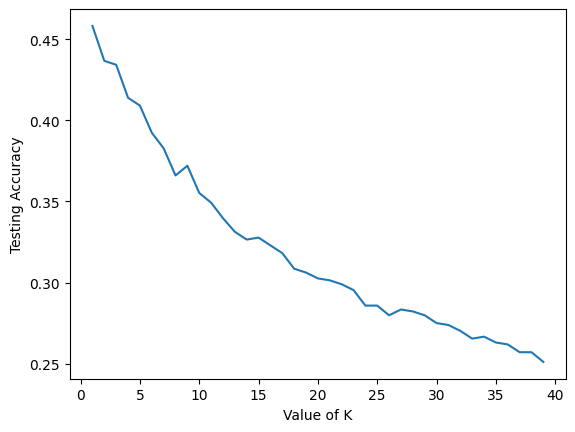

In [ ]:
k_range = range(1, 40)

# Creating a Python list by [] and then appending the accuracy scores

scores = []
#  looping through the k range 1 to 40

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,np.ravel(y_train,order='C'))
    y_pred = knn.predict(X_test)
    # appending the accuracy scores in the list named scores.
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)
# Printing the K number of neighbors and Testing Accuracy.
import matplotlib.pyplot as plt

# This command allow plots to appear within the notebook
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')

This plot shows the testing accuracy as a function of k, meaning that it shows the ideal level of k. In order to improve the performance of the model, I will rerun the code using the k value of 1 rather than a k value of 10.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
# Setting the number of neighbors
classifier = KNeighborsClassifier(n_neighbors=1)
# Loading the training set. np ravel is used to align the train data and its class label in the same orientation
classifier.fit(X_train, np.ravel(y_train,order='C'))

# Predicting the test labels
y_pred = classifier.predict(X_test)
y_pred
from sklearn.metrics import classification_report, confusion_matrix
# creating confusion matrix and printing the classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
accuracy =  accuracy_score(y_test,y_pred)*100
print(accuracy)

[[85  0  0 ...  0  0  0]
 [ 2 38  4 ...  0  0  0]
 [ 2  0 38 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        96
           1       0.81      0.70      0.75        54
           2       0.70      0.70      0.70        54
           3       0.63      0.65      0.64        34
           4       0.83      0.83      0.83        23
           5       0.55      0.62      0.58        29
           6       0.50      0.54      0.52        13
           7       0.14      1.00      0.25         1
           8       1.00      0.86      0.92         7
           9       0.40      0.67      0.50         3
          10       0.00      0.00      0.00         1
          11       0.75      0.75      0.75         4
          12       0.55      0.55      0.55        11
          13       0.38      0.50      0.43        12
          14       0.50      0.30

Running the alogrithm with a k of 1 has increased the accuracy of the model to be 46%

**Conclusion**
1. This project has found that a k-nn alogrithm prediting life expectancy at birth from total fertility rate, rate of natural change per 1,000 population, and crude death rate data in Africa 1950-2100 has an accuracy rate of 46%.
2. I think that the biggest shortcoming of this project is the low accuracy rate that resulted from the k-nn alogrithm. There are 2 disadvantages of k-nn  that I think may especially apply to the data that I chose. The first is that k-nn is sensative to noisy data. In this dataset, there is large variation in country size, which could introduce noise. There is also large spread in crude death rate. The second disadvange is that k-nn is sensative to outliers. The other two indicators, natural change and fertility rate, are both skewed and have outliers, which could be hurting the accuracy of the algorithm.
3. In a paper titled 'Machine learning algorithms for predicting life expectancy', the authors compared the usage of k-nn vs. linear regression to predict life expectancy after SARS-Covid. The authors concluded that "The inclusion and dependency of these suggested features on life expectancy is still a matter of debate and a future part of research in this particular domain. Furthermore, the future enhancement can be made by using deep learning  algorithm  which  may  give  better  solution. Depending  on  the  dataset,  and  other variables, the best adaptation is made."

  Harizaj, M., Idrizi, O., &amp; Harizaj, A. (2023, March 5). Machine learning algorithms for predicting life expectancy. https://publish.mersin.edu.tr/index.php/aed/article/view/938/781

4. Based on the paper, I believe it will be insightful to use this dataset with other machine learning algorithms in future projects and see which one is most successful. In the future, I would also like to make use of the many other interesting variables in this dataset, since it includes so many useful demographic indicators.